<a href="https://colab.research.google.com/github/AlexButrimov/DSde/blob/master/EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [ ]:
titanic = pd.read_csv('/content/sample_data/train.csv')


In [ ]:
titanic.head(3) # первые три строки

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [ ]:
titanic.sample(5) #случайные 5 наблюдений 5 случайных объестов

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,S


In [ ]:
titanic.info() # статистика по типам данных

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
titanic.isnull().sum() # находим пропуски и суммируем их по столбцам

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
(titanic.isna().sum()/len(titanic)).round(4)*100 # пропущенные значения в процентах

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.91
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.00
dtype: float64

In [ ]:
pip install missingno #с помощью этого модуля можно графически визуализировать данные

In [ ]:
# импортируем библиотеку missingno с псевдонимом msno
import missingno as msno
# сделаем стиль графиков seaborn основным
sns.set()

<Axes: >

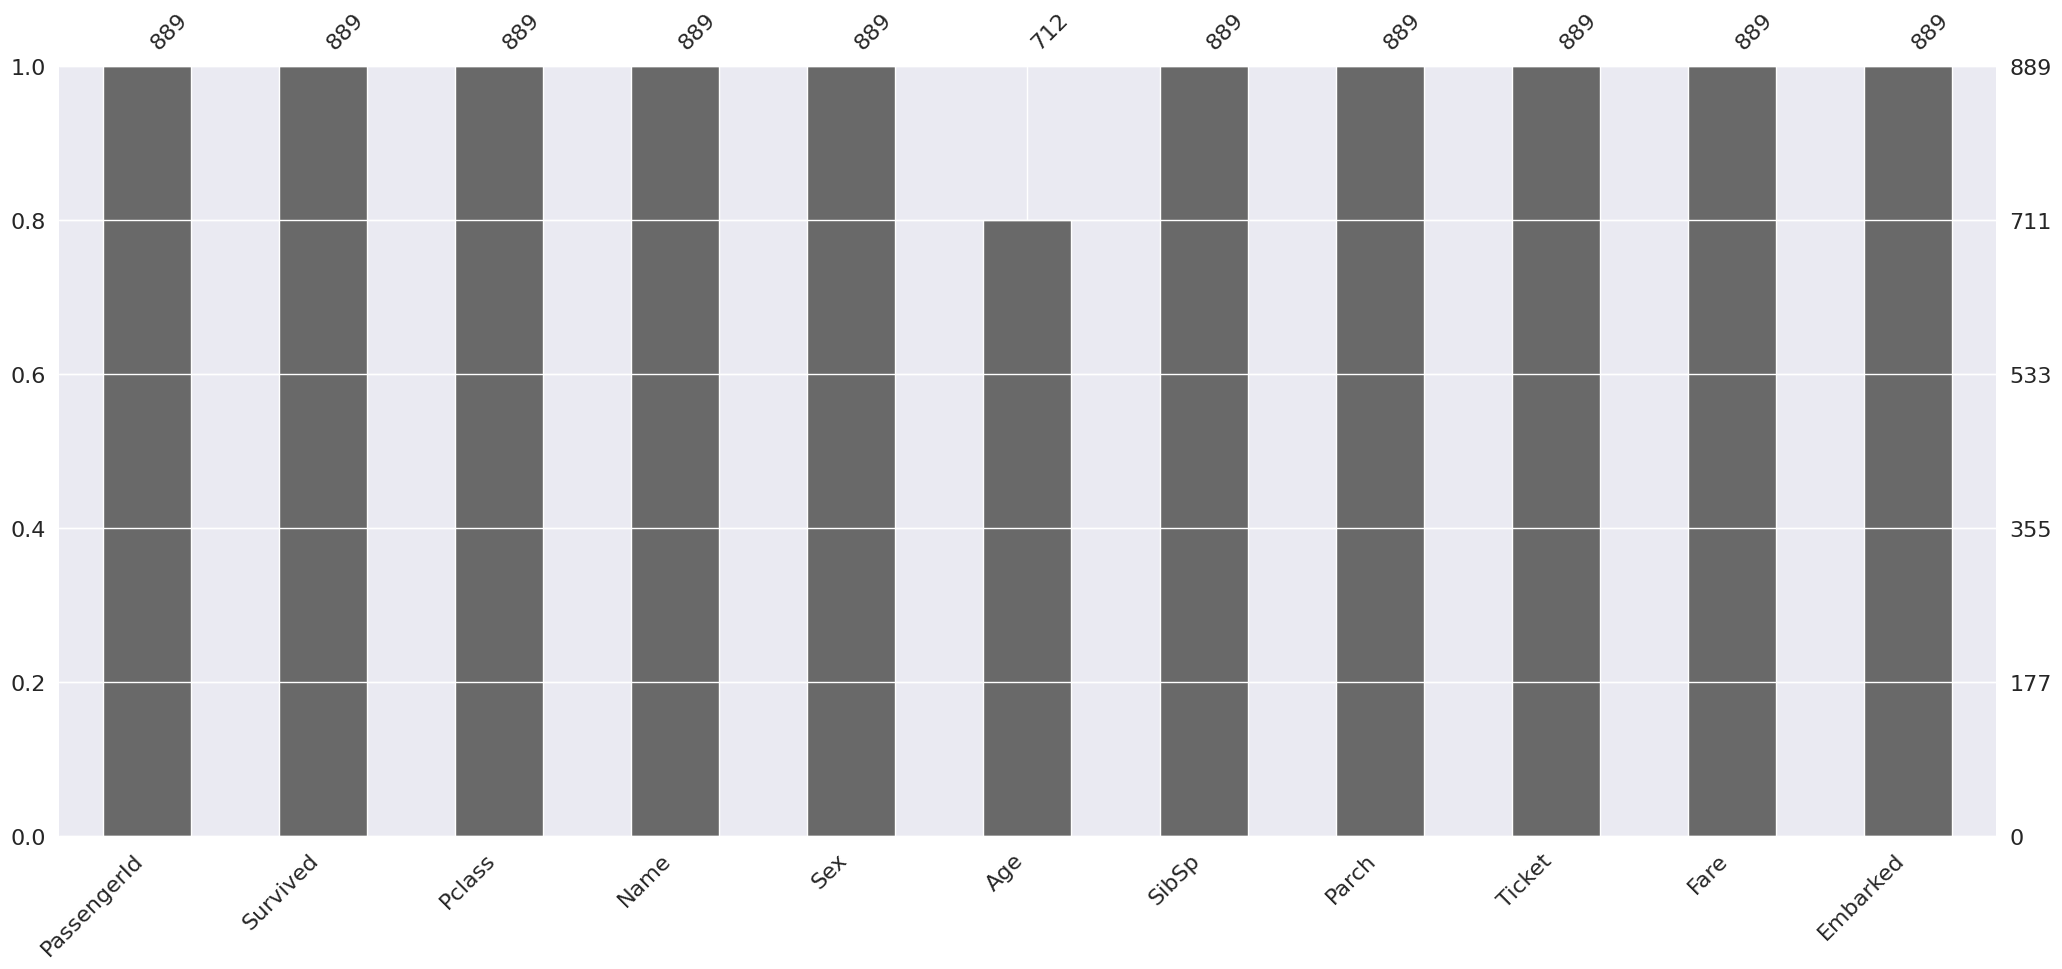

In [ ]:
msno.bar(titanic) # видим информацию об отсутствующих значениях

<Axes: >

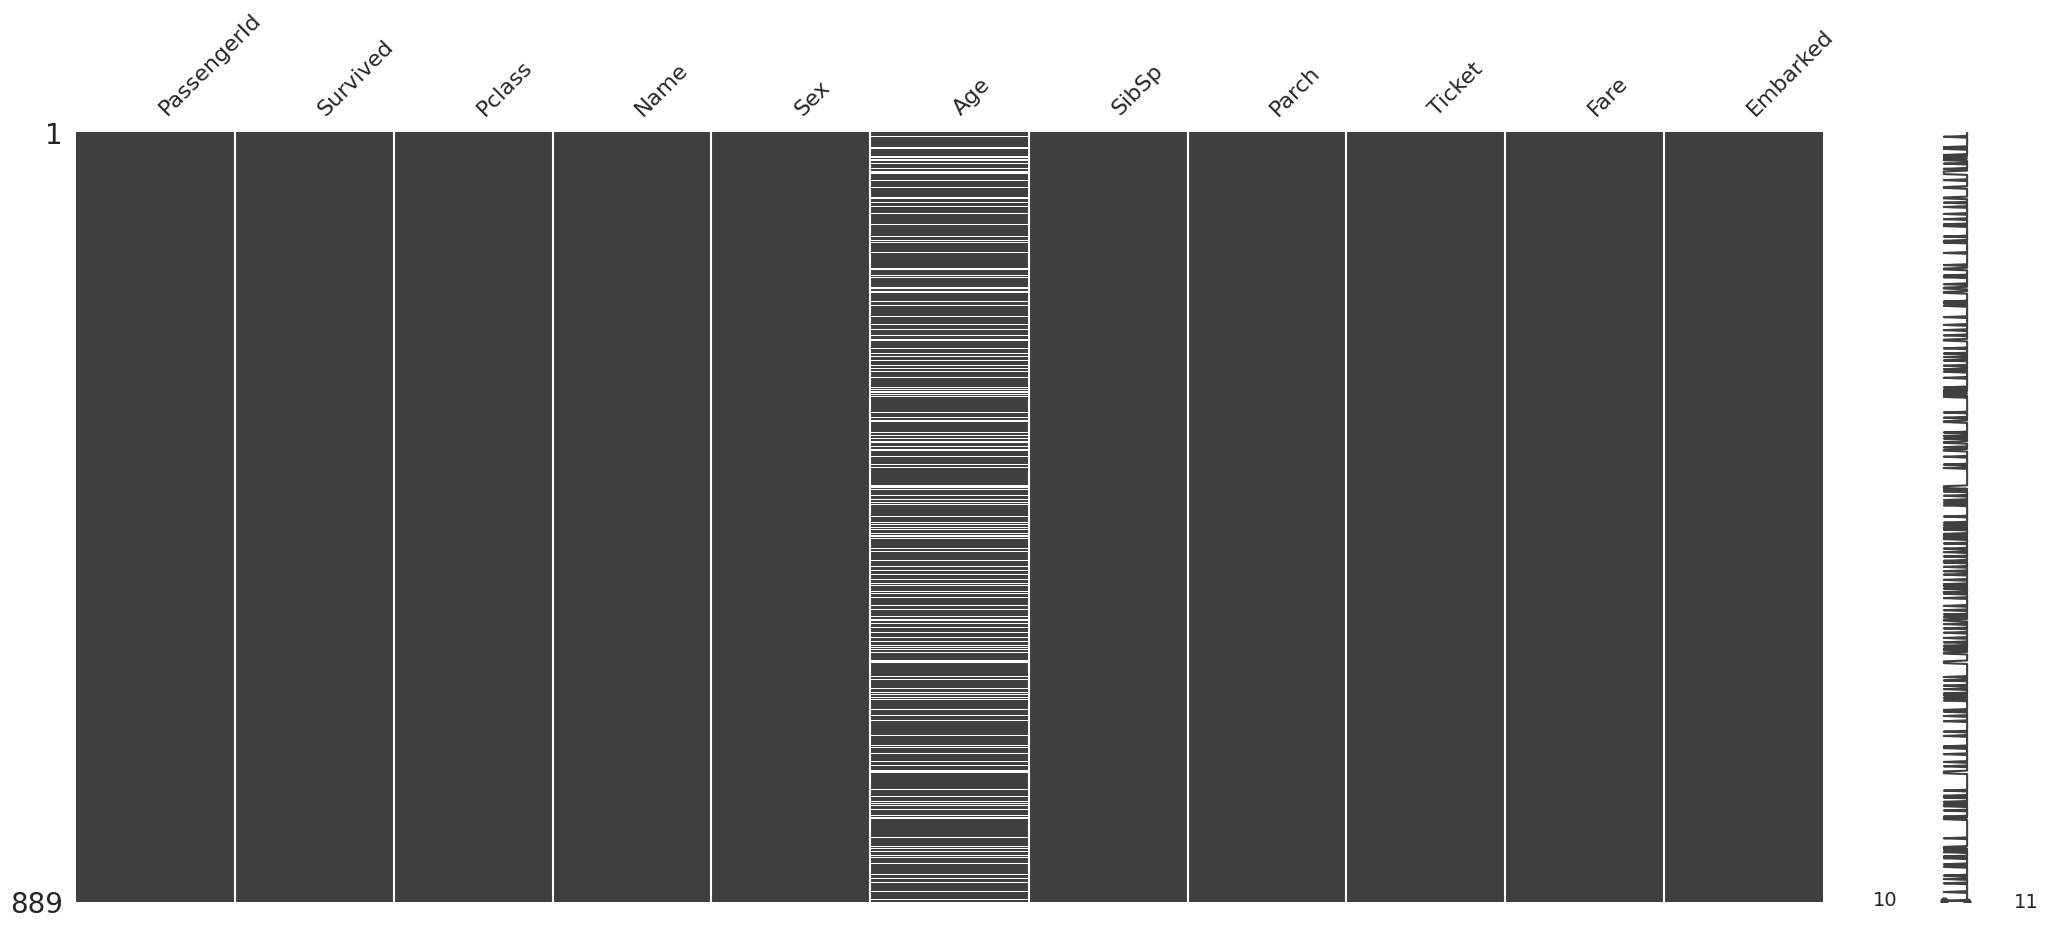

In [ ]:
msno.matrix(titanic) # соотношение отсутствующих значений к тем которые есть

# Удаление пропусков

Удаление строк

In [ ]:
# удаление строк обозначим через axis = 'index'
# subset = ['Embarked] говорит о том, что мы ищем пропуски только в столбце Embarked
titanic.dropna(axis = 'index', subset = ['Embarked'], inplace = True)

In [ ]:
# убедимся в Embarked действительно не осталось пропусков
titanic.Embarked.isna().sum()

0

Удаление столбцов

In [ ]:
# передадим в параметр Columns тот столбец, который хотим удалить
titanic.drop(columns = ['Cabin'], inplace = True)

In [ ]:
# убедимся, что такого столбца болше нет
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Заполнение константой
Метод .fillna()
Количественные данные

In [ ]:
# вначале создаем копию датасета
fillna_const = titanic.copy()

# заполним пропуски в столбце Age нулями, передав методу .fillna() словарь
# где ключами будут названия  столбцов, а назначениями - константы для заполнения пропусков

fillna_const.fillna({'Age' : 0}, inplace = True)

In [ ]:
# посмотрим как заполнение отразилось на данных, как изменилась медиана: до замены - 28, после - 24
titanic.Age.median(), fillna_const.Age.median()

(28.0, 24.0)

Категориальные данные

In [ ]:
# найдем пассажиров с неизвестным портом посадки
# для этого создадим маску по столбцу Embarked и применим ее к исходным данным
# missing_embarked = pd.read_csv('train.csv')
missing_embarked[missing_embarked.Embarked.isnull()]

NameError: name 'missing_embarked' is not defined

In [ ]:
# метод .fillna() можно применить к одному столбцу
# два пропущенных значения в столбце Embarked заполним буквой S (порт посадки найденный в интернет - Southampton)
fillna_const.Embarked.fillna('S', inplace = True)

In [ ]:
# убедимся, что в столбцах Age и Embarked не осталось пропущенных значений
fillna_const[['Age', 'Embarked']].isna().sum()

Age         0
Embarked    0
dtype: int64

Методы .unique() и .value_counts()

In [ ]:
# применим метод библиотеки Numpy
np.unique(titanic.Survived, return_counts = True)

(array([0, 1]), array([549, 342]))

In [ ]:
# теперь воспользуемся методами библиотеки Pandas
# первый метод возвращает только уникальные значения
titanic.Survived.unique()

array([0, 1])

In [ ]:
# второй - уникальные значения и их частоту
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [39]:
# для получения относительной частоты, делить на общее количество строк не нужно,
# достаточно указать параметр normalize = True
titanic.Survived.value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

df.discribe() - краткий статистический обзор наших данных

In [40]:
titanic[['Sex', 'Embarked']].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


countplot и barplot\
\
seaborn

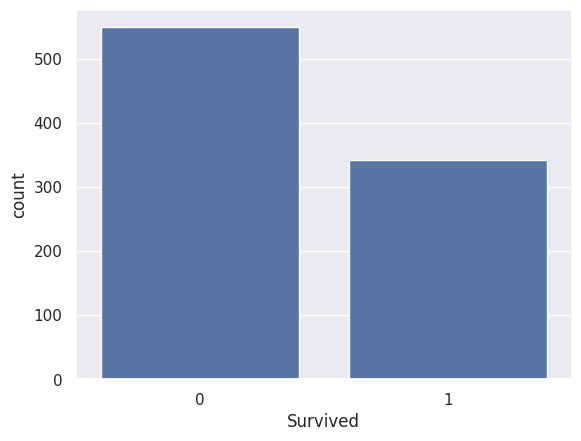

In [41]:
# функция countplot() сама посчитает количество наблюдений из категорий
sns.countplot(x = 'Survived', data = titanic);

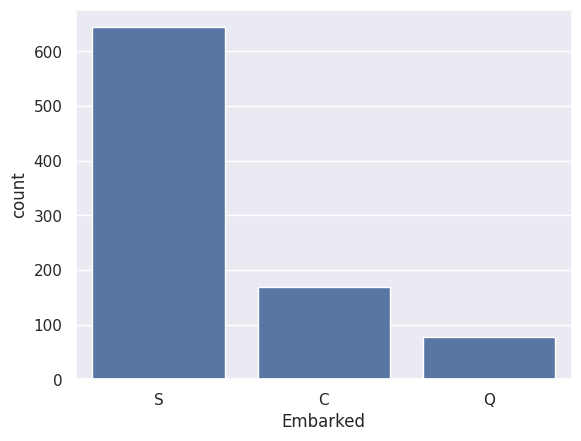

In [42]:
sns.countplot(x = 'Embarked', data = titanic);

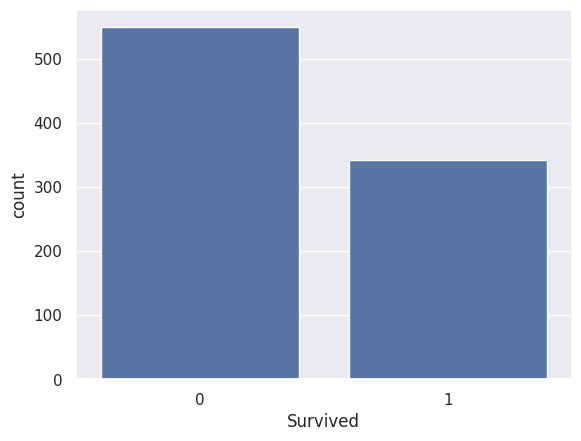

In [43]:
# для функции barplot() количество наблюдений можно посчитать
# с помощью метода .value_counts()
sns.barplot(x = titanic.Survived, y = titanic.Survived.value_counts());

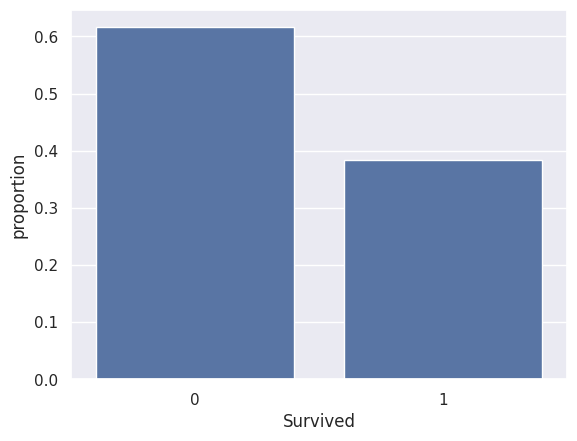

In [45]:
# относительное количество наблюдений удобно посчитать с параметром normalize = True
sns.barplot(x = titanic.Survived, y = titanic.Survived.value_counts(normalize = True));

##Количественные данные

In [46]:
titanic.describe() # функция работает для численных значений

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

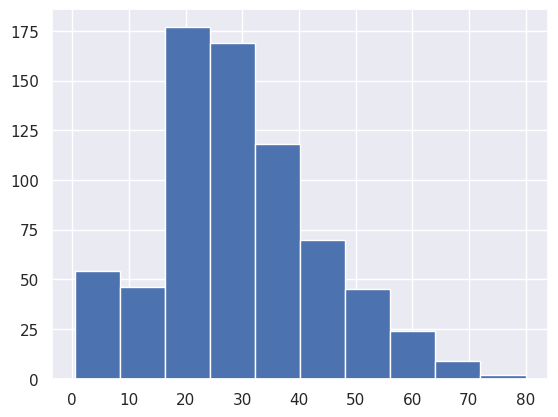

In [48]:
# гистограмма распределние возраста с помощью библиотеки Matplotlib
plt.hist(titanic.Age, bins = 10)

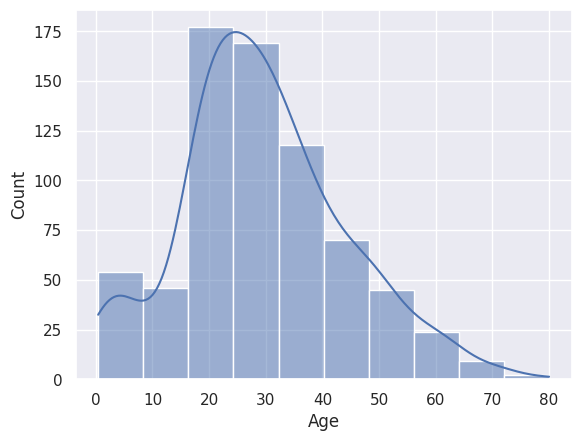

In [49]:
# в библиотеке Seaborn мы указываем источник данных, что будет на оси X и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data = titanic, x = 'Age', bins = 10, kde = True);

# Одномерный и многомерный анализ

Одномерный анализ сосредоточен на изучении одного показателя. Многомерный анализ, с другой стороны, предлагает одновременное изучение более чем одной характеристики.

# Два категориальных признака

Вначале возьмем случай двух категориальных признаков. Например, мы хотим понять насколько выживаемость пассажира (целевая переменная) зависит от класса, которым он путешествовал.

# countplot и barplot

В первую очередь стоит визуально оценить есть ли такое различие или нет. Для этого подойдут столбчатые диаграммы, где мы либо располагем два столбца целевого признака рядом друг с другом (grouped), либо делаем один столбец и разбиваем его на две части (stacked)

<Axes: xlabel='Pclass', ylabel='count'>

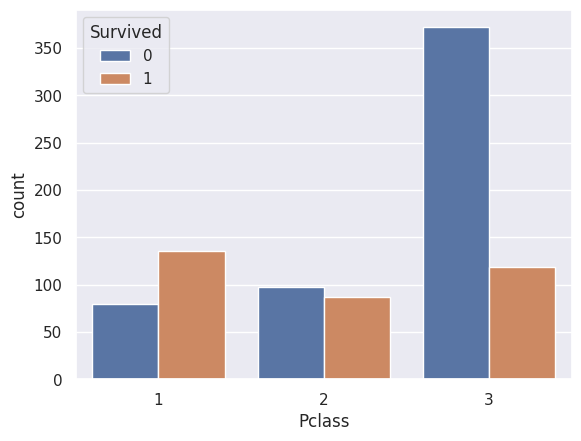

In [51]:
# countplot и barplot
# создадим grouped countplot, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших(0) и выживших(1)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)

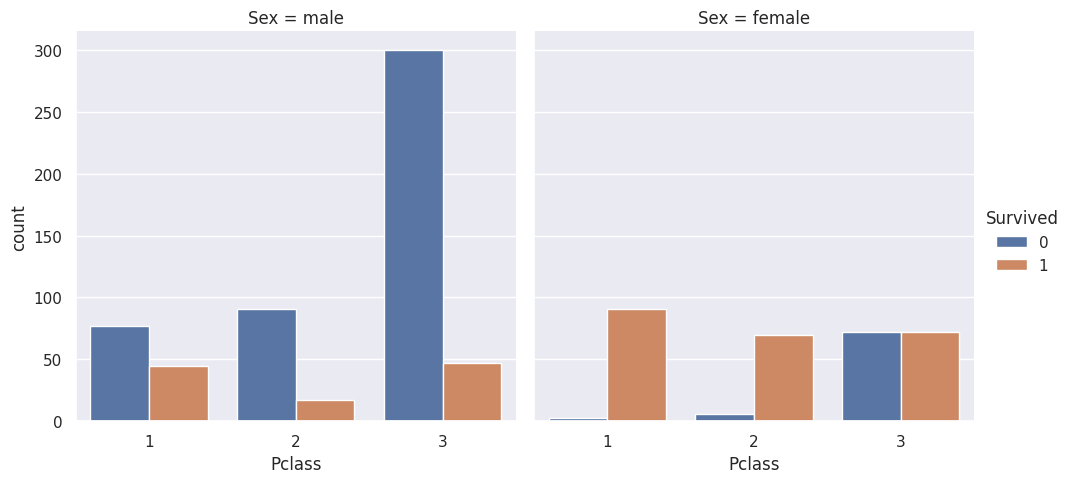

In [54]:
# добавим еще признак (пол) через параметр col
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = titanic);

# Гистограммы

Когла у нас одна количественная и категориальная переменные, для их визуализации проще построить две налодженные друг на друга гистограммы

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

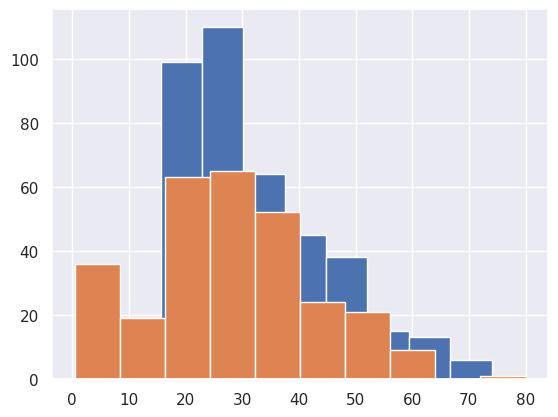

In [58]:
# выведем две гистограммы на одном графике в библиотеке Matplotlib
plt.hist(x = titanic[titanic['Survived'] == 0] ['Age'])
plt.hist(x = titanic[titanic['Survived'] == 1] ['Age'])

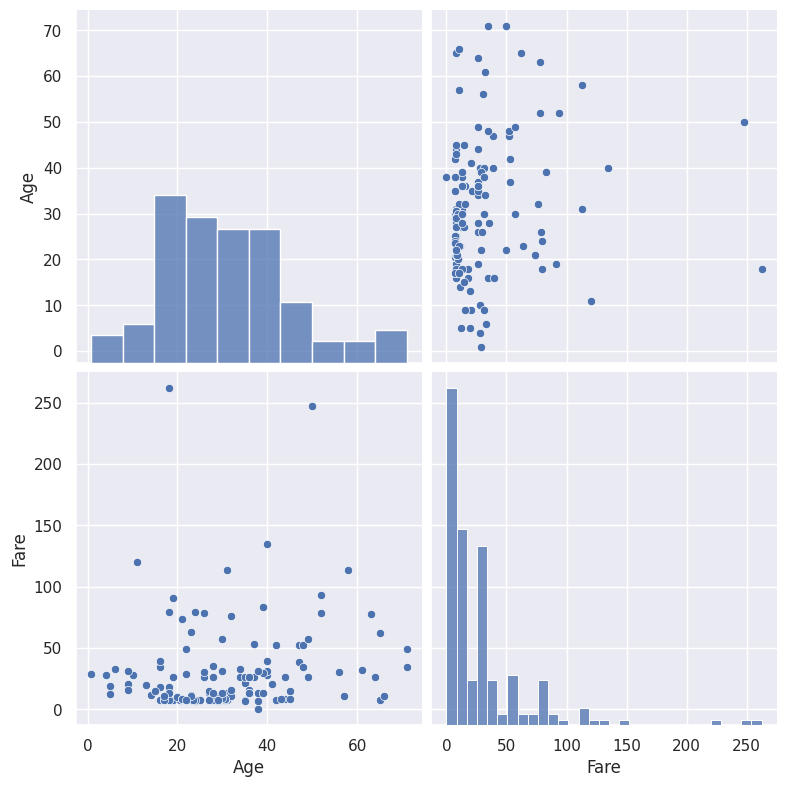

In [59]:
# параметр height функции pairplot() задает высоту каждого графика в дюймах
sns.pairplot(titanic[['Age', 'Fare']].sample(frac = 0.2, random_state = 42), height = 4);

обратите внимание на метод .sample() с параметром frac = 0.2, который мы применили к датафрейму titanic. Таким образом, мы сделали случайную выборку из 20% наблюдений.\
Метод .sample() в данном случае применяется для того, чтобы ускорить создание pairplot. Зачастую, при наличии большого числа наблюдений, график может строиться очень долго.\
При добавлении парметра hue (разделение по категориальной переменной) гистограмма по умолчанию превращается в график плотности.


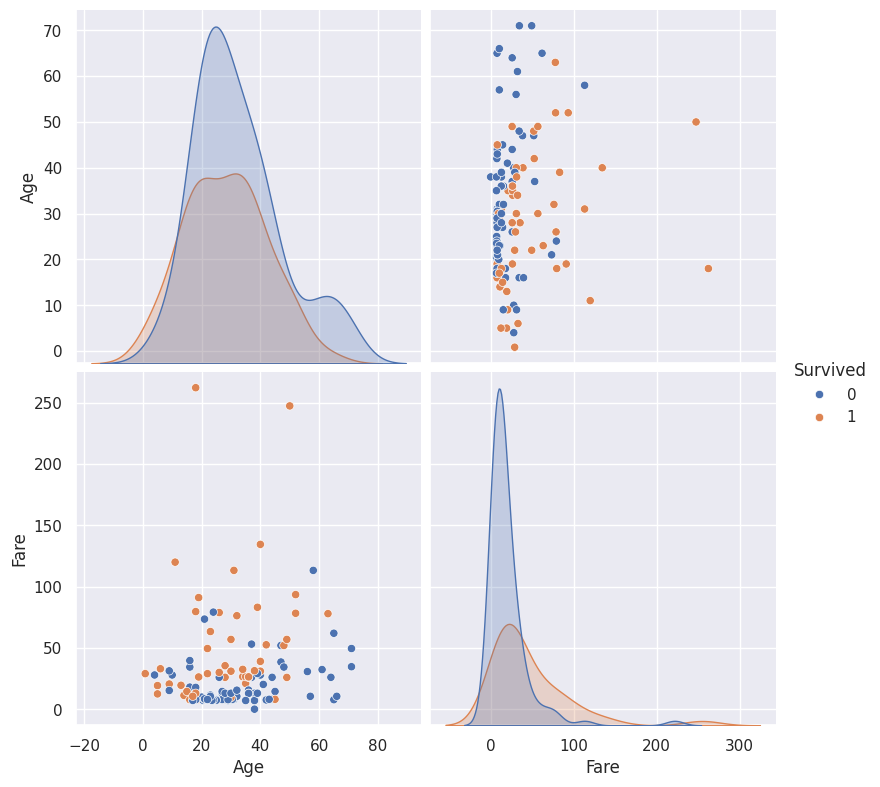

In [60]:
# обратите внимание, что столбец Survived мы добавили и в параметр hue и в датафрейм с данными
sns.pairplot(titanic[['Age', 'Fare', 'Survived']].sample(frac = 0.2, random_state = 42), hue = 'Survived', height = 4);

По большому счету, с помощью такого графика мы пытаемся ответить на вопрос, есть ли взаимосвязь между возрастом пассажиров и стоимостью их билетов в разрезе выживаемости.

## Sweetviz

In [61]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.1 MB/s eta 0:00:00


In [70]:
import sweetviz as sv
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [71]:
comparison = sv.compare(train, test)

                                             |          | [  0%]   00:00 -> (? left)


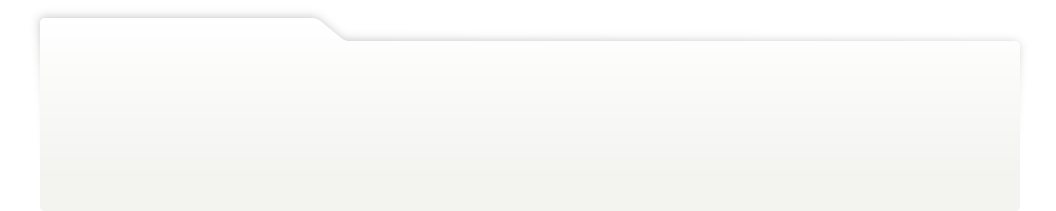
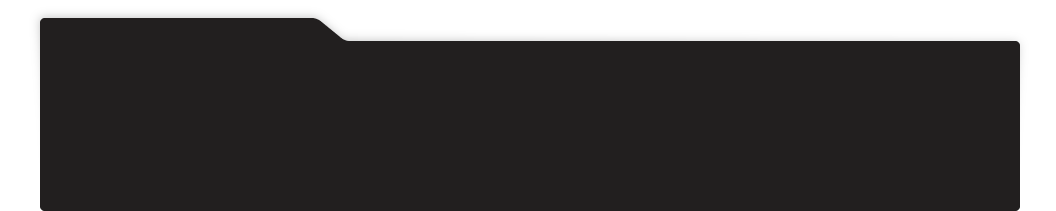
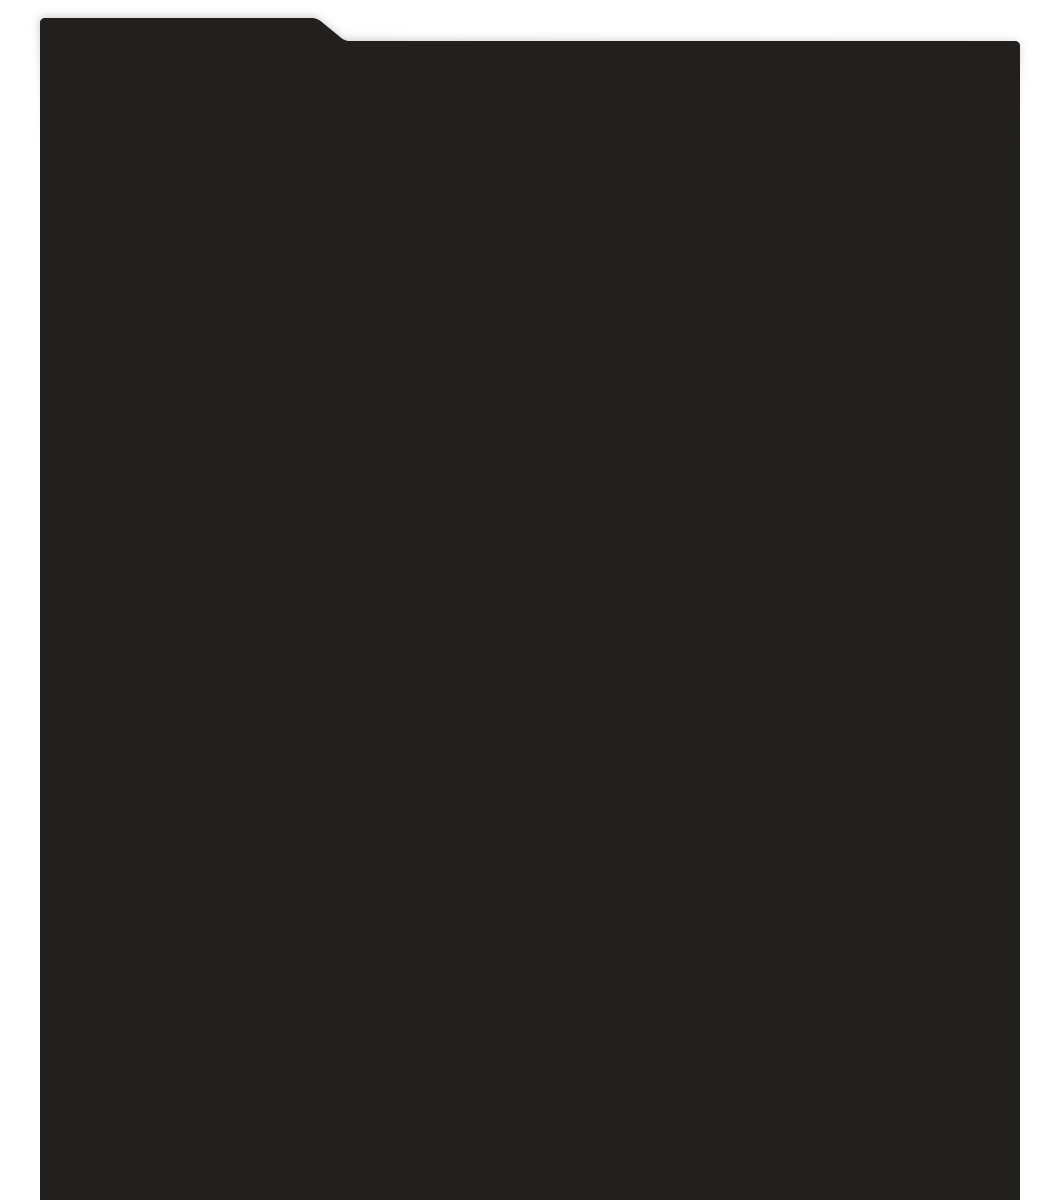
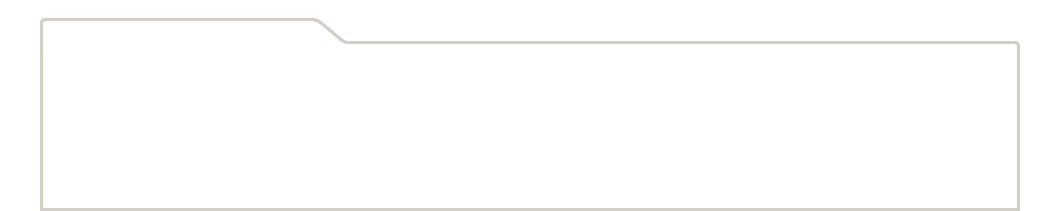
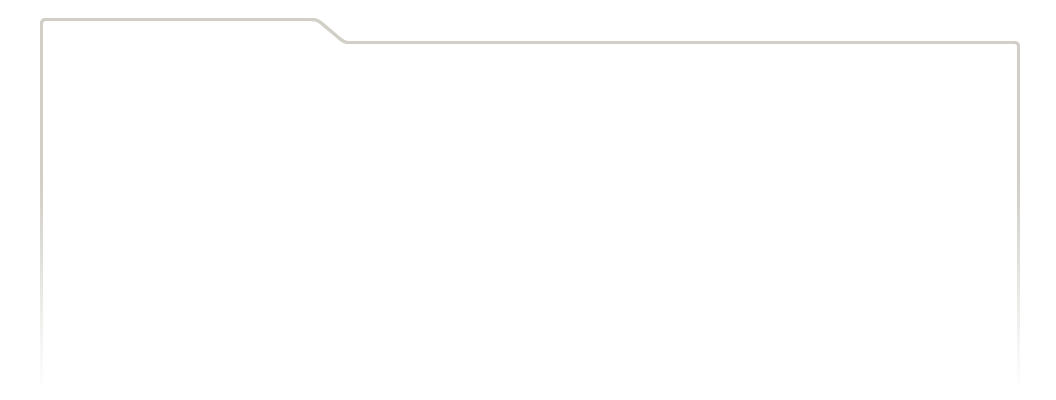
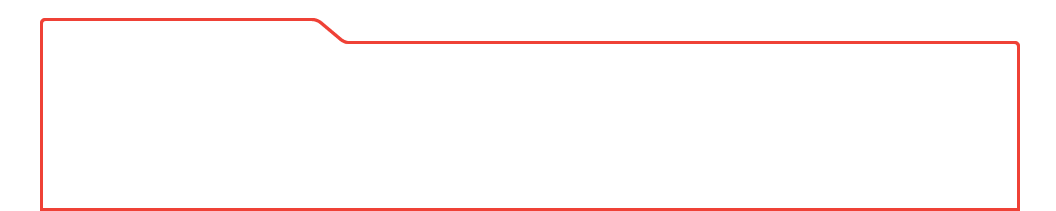
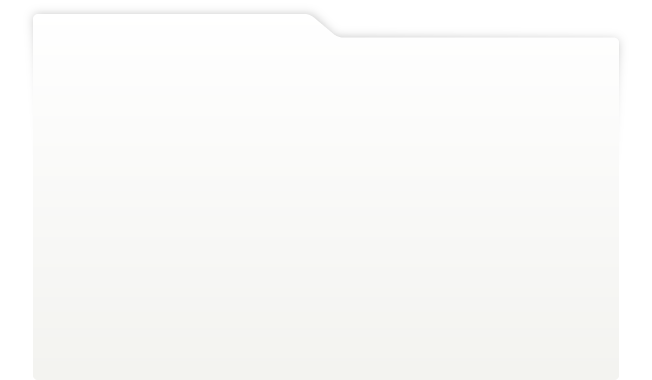
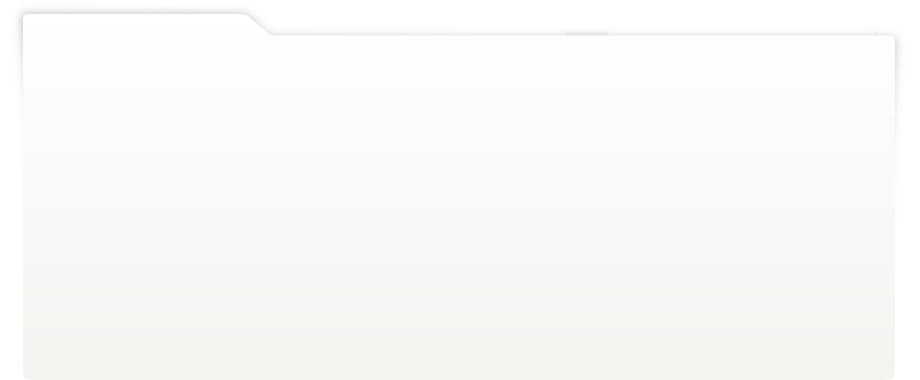
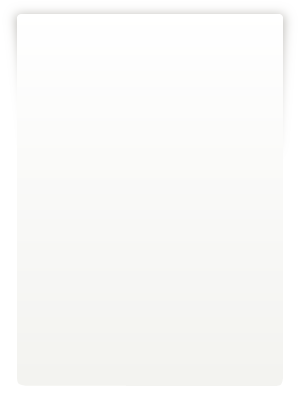
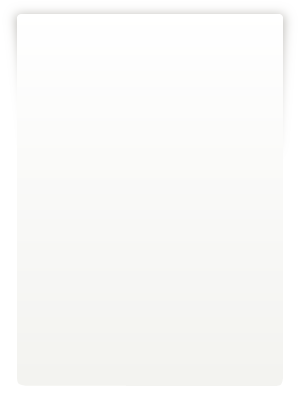
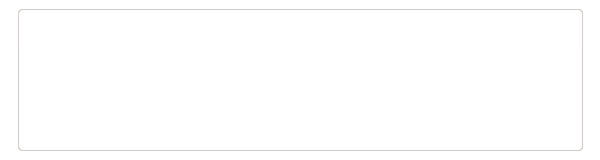
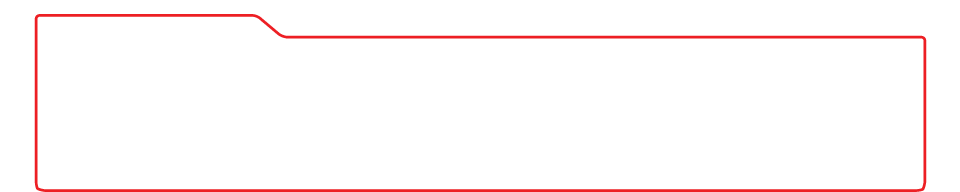
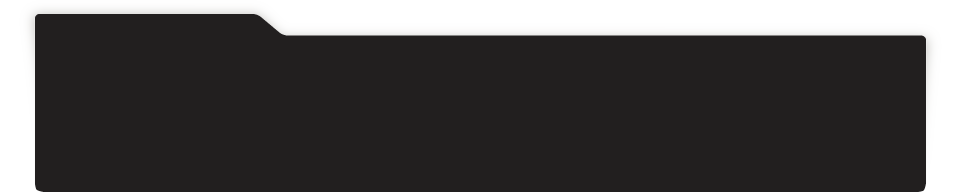
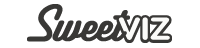
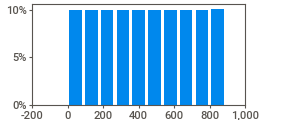
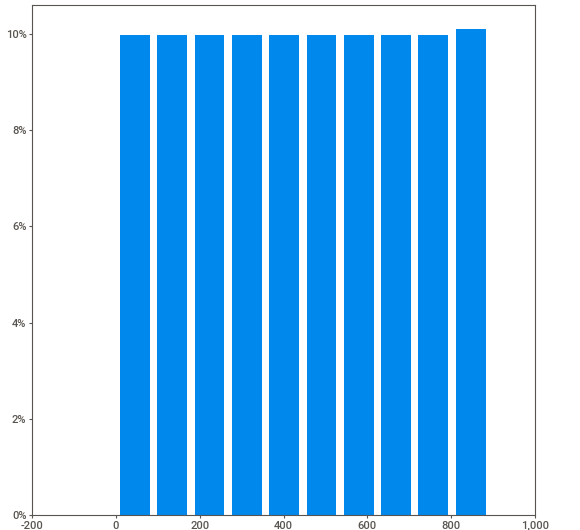
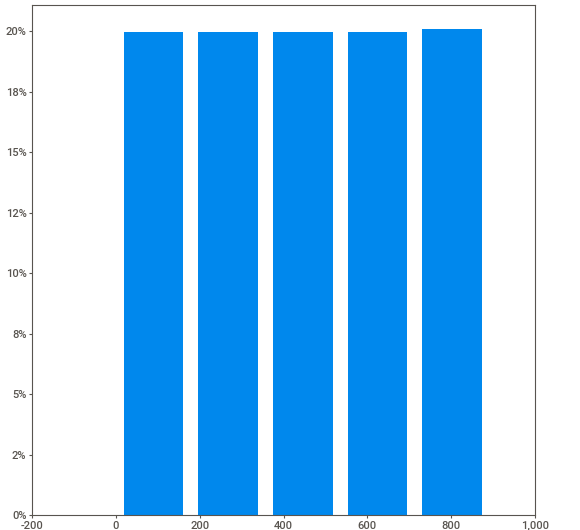
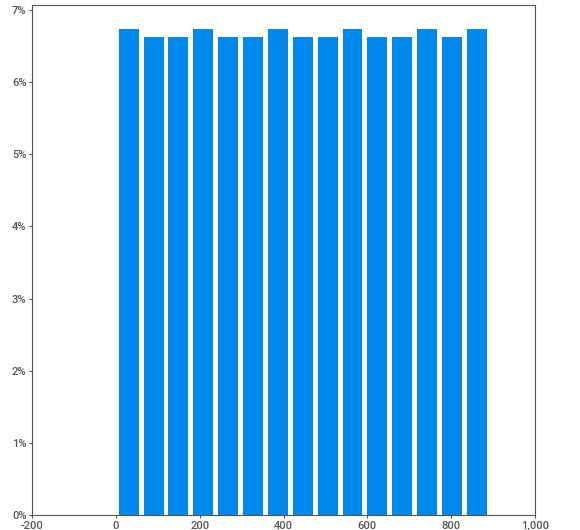
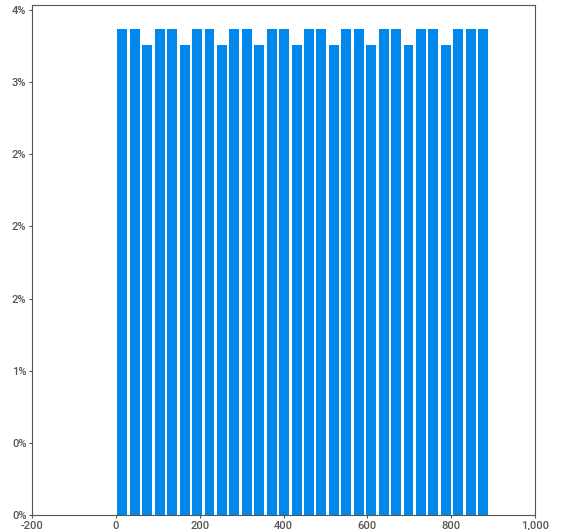
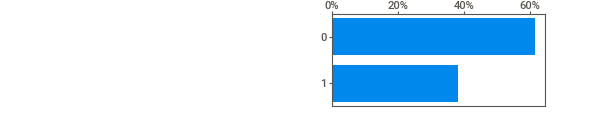
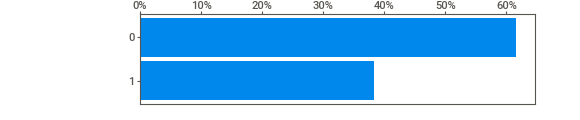
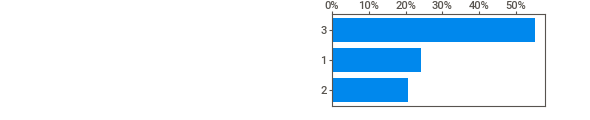
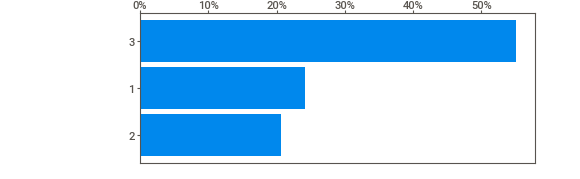
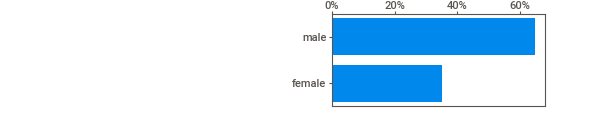
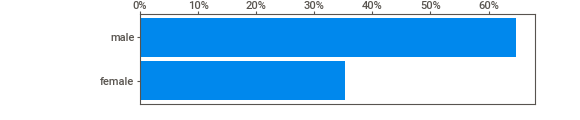
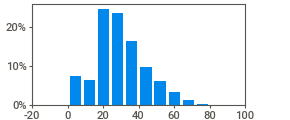
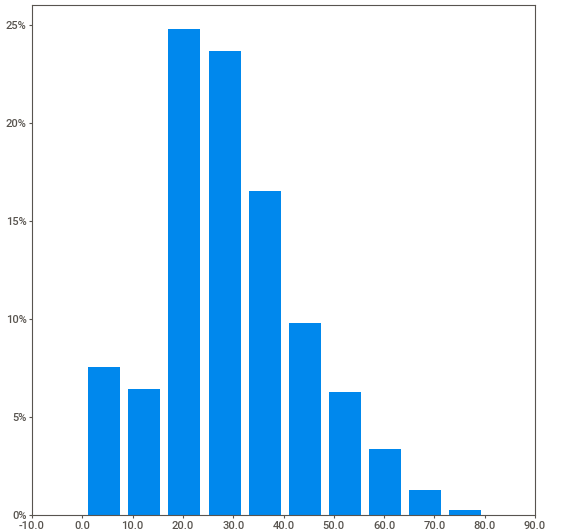
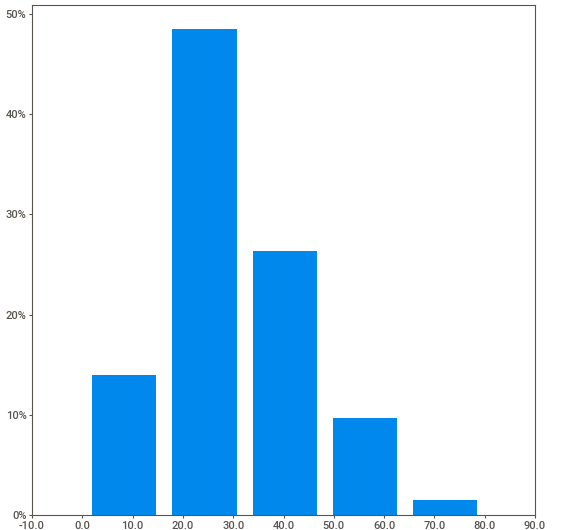
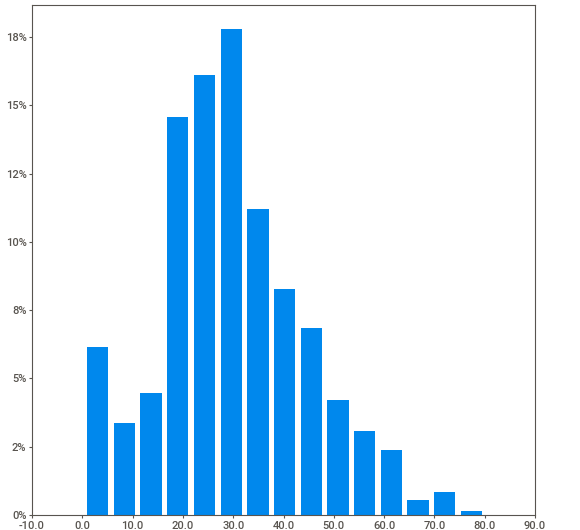
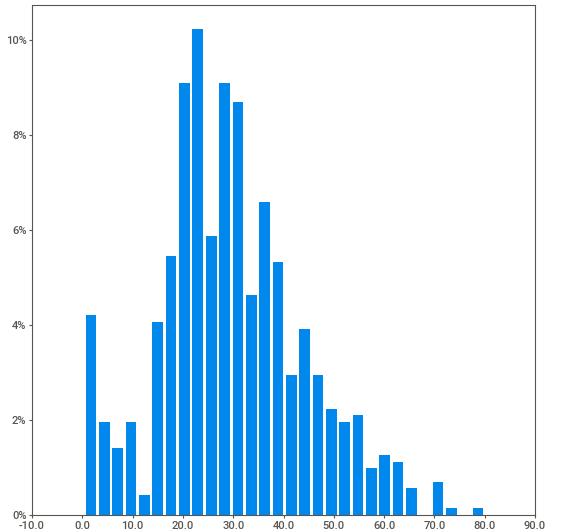
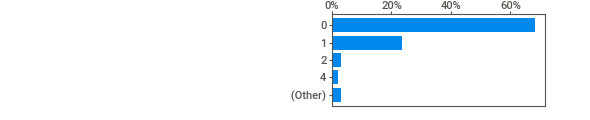
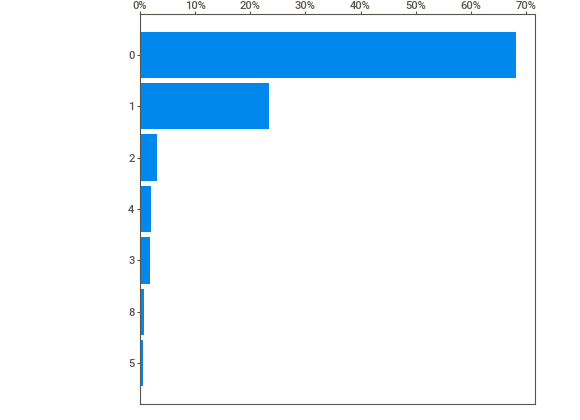
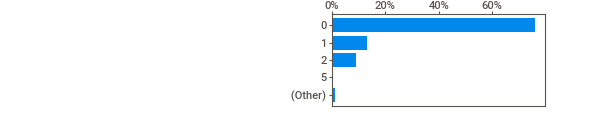
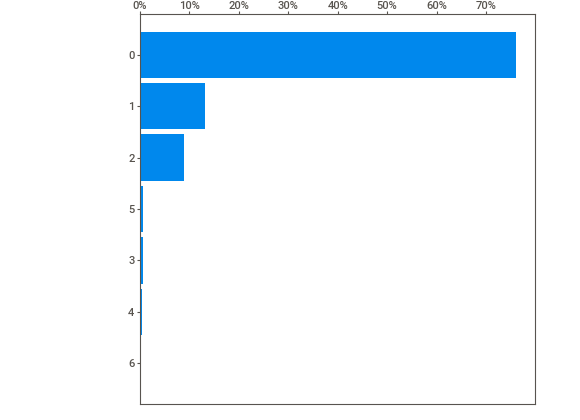
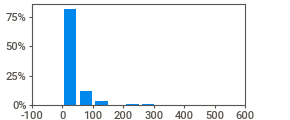
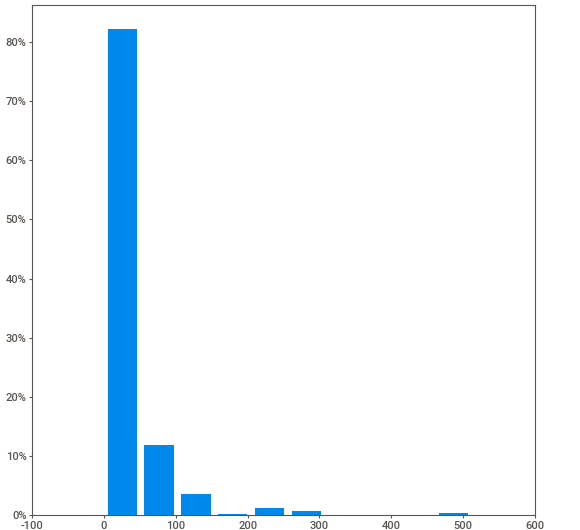
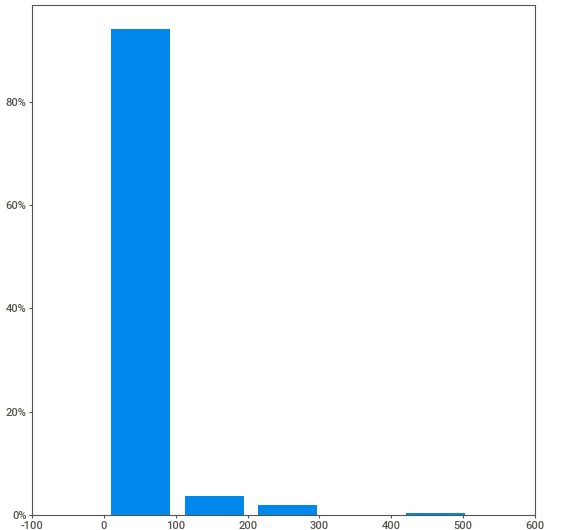
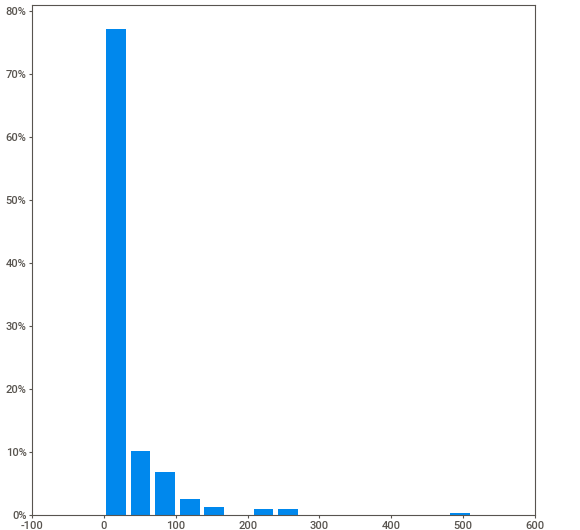
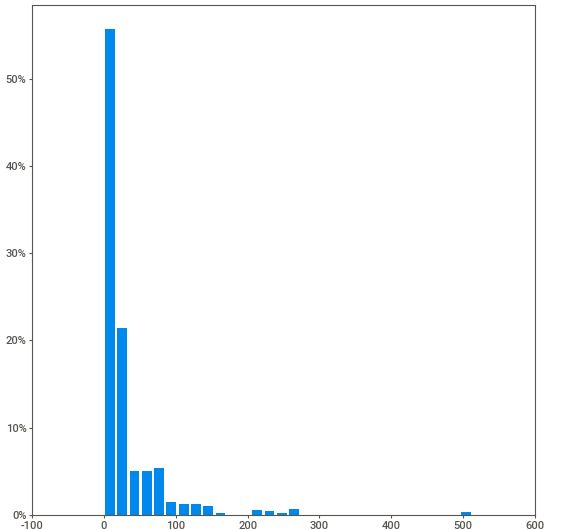
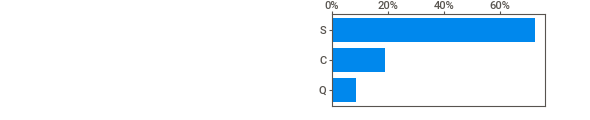
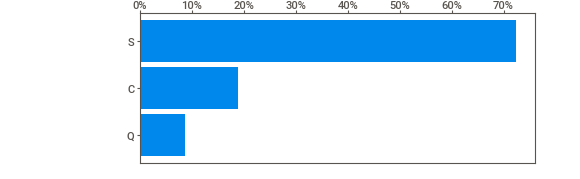
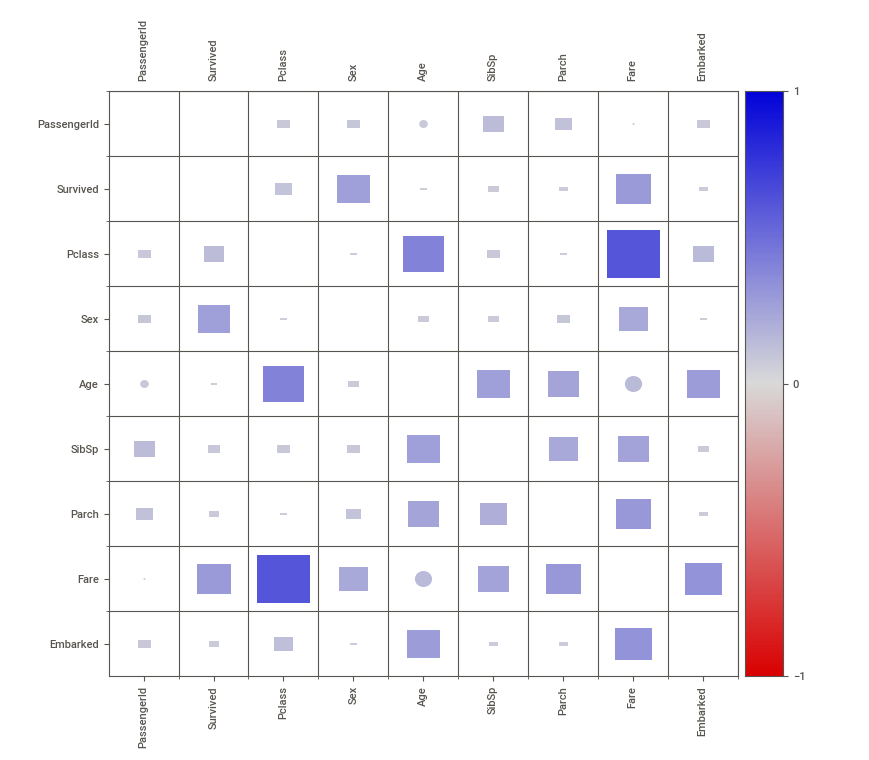
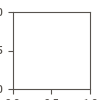

In [72]:
# применим метод .show_notebook()
comparison.show_notebook()